In [1]:
from biocrnpyler import *
import pylab as plt
import pandas as pd
import numpy as np

data_file = "basic-parts-biocrnpyler-translator - Parts List.tsv"

df = pd.read_csv(data_file, sep='\t')

df.loc[:, ['Part Type']].to_numpy()

#Dictionary to convert Part Types to BioCRNpyler classes
type_to_class = {
    'CDS':[CDS],
    'RBS':[RBS],
    'Terminator-ConstituitivePromoter':[Terminator, Promoter],
    'Terminator-RegulatedPromoter':[Terminator, RegulatedPromoter],
    'Linker':[],
    'Backbone':[]
}
print(df)

                   Part Name  Part ID                         Part Type  \
0                      sfGFP      NaN                               CDS   
1                   mtagBFP2      NaN                               CDS   
2                    mCherry      NaN                               CDS   
3                       TetR      NaN                               CDS   
4                       LacI      NaN                               CDS   
5                  UTR1-RBS1      NaN                               RBS   
6                  UTR1-RBS2      NaN                               RBS   
7                  UTR1-RBS3      NaN                               RBS   
8                  UTR2-RBS1      NaN                               RBS   
9                  UTR2-RBS2      NaN                               RBS   
10                 UTR2-RBS3      NaN                               RBS   
11                 UTR3-RBS1      NaN                               RBS   
12                 UTR3-R

In [2]:
#Constructs:
c1 = ["BASIC_SEVA_26", "LMP", "Terminator1_J23101_RiboA", "UTR1-RBS3", "sfGFP", "LMS"]
c2 = ["BASIC_SEVA_26", "LMP", "Terminator2_LacI_RiboB", "UTR1-RBS3", "mCherry", "LMS"]
c3 = ["BASIC_SEVA_36", "LMP", "Terminator1_J23101_RiboA", "UTR1-RBS2", "sfGFP", "UTR2-RBS1", "mTagBFP2", "UTR3-RBS1", "mCherry", "LMS"]
c4 = ["BASIC_SEVA_26", "LMP", "Terminator1_TetR_RiboA", "UTR1-RBS2", "LacI", "UTR2-RBS2", "sfGFP", "L1", "Terminator2_LacI_RiboB", "UTR3-RBS2", "TetR", "LMS"]
c5 = ["BASIC_SEVA_37_CmR-p15A.1", "LMP", "Terminator1_J23104_RiboA", "UTR2-RBS1", "mTagBFP2", "UTR3-RBS3", "mCherry", "UTR1-RBS3", "sfGFP", "LMS"]

basic_constructs = [c1, c2, c3, c4, c5]

In [3]:
biocrnpyler_constructs = []
for c in basic_constructs:
    print(c)
    bc_list = []
    for p in c:
        pt = df.loc[df['Part Name'] == p]['Part Type'].to_string(index = False)
        keywords = df.loc[df['Part Name'] == p]['BioCRNpyler Args'].to_string(index = False)
        try:
            class_list = type_to_class[pt]
            if keywords != "NaN":
                exec("D = {"+keywords+"}")
                D['name'] = pt.replace("-", "_")
                print(p, pt, keywords)
                for C in class_list:
                    part = C(**D)
                    bc_list.append(part)
                    print("\t", part)
        
        except KeyError:
            print("Unknown Part Type", pt)
    biocrnpyler_constructs.append(bc_list)


['BASIC_SEVA_26', 'LMP', 'Terminator1_J23101_RiboA', 'UTR1-RBS3', 'sfGFP', 'LMS']
BASIC_SEVA_26 Backbone  
LMP Linker  
Terminator1_J23101_RiboA Terminator-ConstituitivePromoter  
	 Terminator_ConstituitivePromoter
	 Terminator_ConstituitivePromoter
UTR1-RBS3 RBS  
	 RBS
sfGFP CDS "protein":"sfGFP"
	 CDS
LMS Linker  
['BASIC_SEVA_26', 'LMP', 'Terminator2_LacI_RiboB', 'UTR1-RBS3', 'mCherry', 'LMS']
BASIC_SEVA_26 Backbone  
LMP Linker  
Terminator2_LacI_RiboB Terminator-RegulatedPromoter "regulators": ["protein_lacR"]
	 Terminator_RegulatedPromoter
	 Terminator_RegulatedPromoter
UTR1-RBS3 RBS  
	 RBS
mCherry CDS "protein":"mCherry"
	 CDS
LMS Linker  
['BASIC_SEVA_36', 'LMP', 'Terminator1_J23101_RiboA', 'UTR1-RBS2', 'sfGFP', 'UTR2-RBS1', 'mTagBFP2', 'UTR3-RBS1', 'mCherry', 'LMS']
BASIC_SEVA_36 Backbone  
LMP Linker  
Terminator1_J23101_RiboA Terminator-ConstituitivePromoter  
	 Terminator_ConstituitivePromoter
	 Terminator_ConstituitivePromoter
UTR1-RBS2 RBS  
	 RBS
sfGFP CDS "protein":"s

C:\Users\wp_ix\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[Terminator_ConstituitivePromoter, Terminator_ConstituitivePromoter, RBS, CDS]
[Terminator_RegulatedPromoter, Terminator_RegulatedPromoter, RBS, CDS]
[Terminator_ConstituitivePromoter, Terminator_ConstituitivePromoter, RBS, CDS, RBS, RBS, CDS]
[Terminator_RegulatedPromoter, Terminator_RegulatedPromoter, RBS, CDS, RBS, CDS, Terminator_RegulatedPromoter, Terminator_RegulatedPromoter, RBS, CDS]
[Terminator_ConstituitivePromoter, Terminator_ConstituitivePromoter, RBS, RBS, CDS, RBS, CDS]


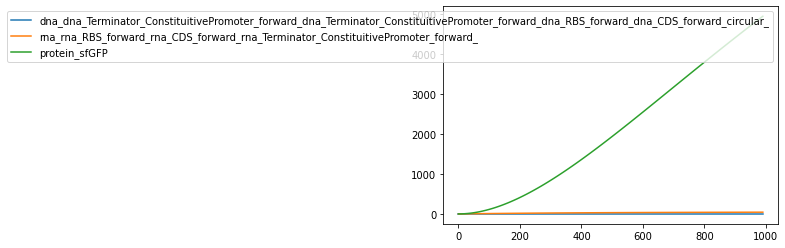

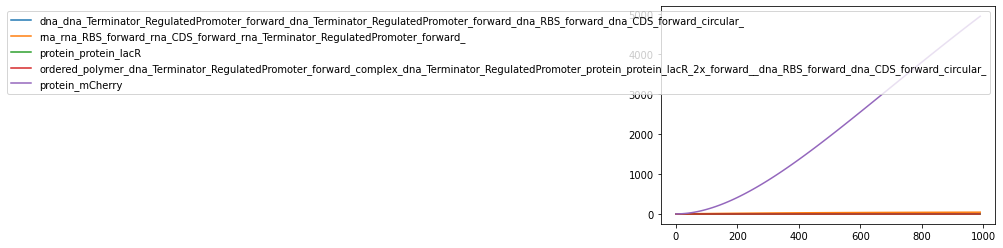

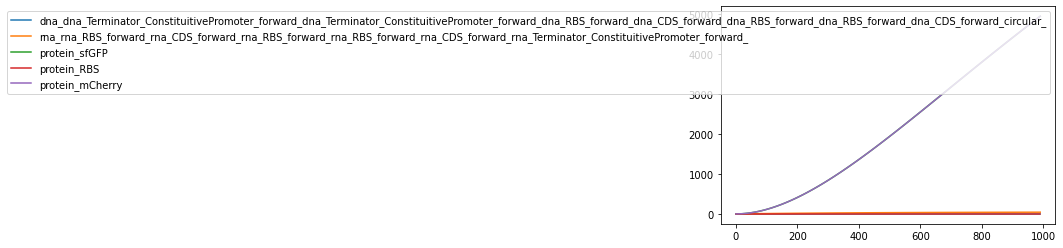

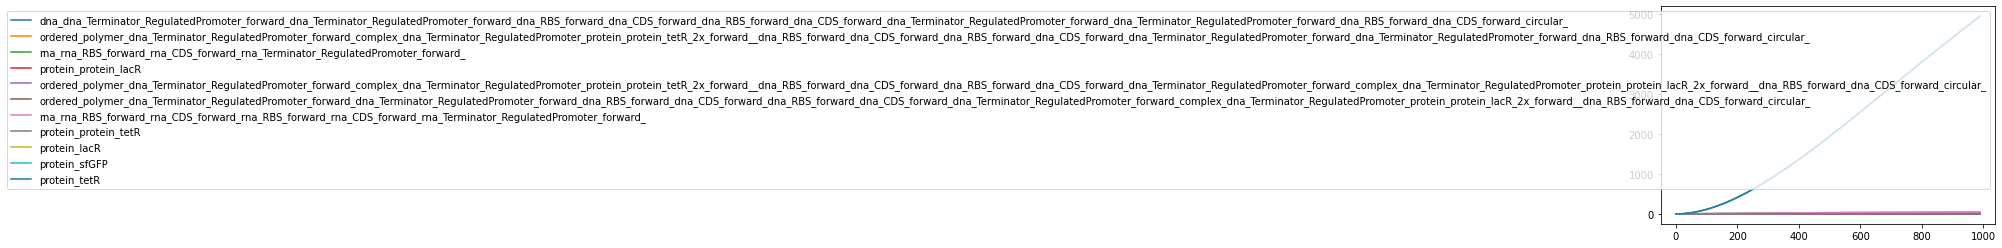

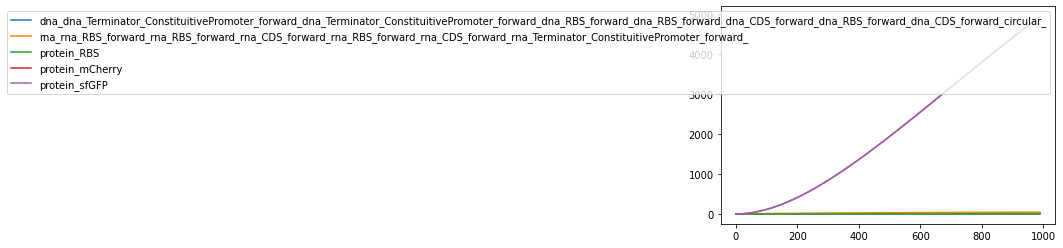

In [5]:
timepoints = np.arange(0, 1000, 10)

for cl in biocrnpyler_constructs:
    print(cl)
    construct = DNA_construct(cl, circular = True)
    
    M = SimpleTxTlDilutionMixture("simple model", components = [construct], parameter_file = "default_parameters.txt")
    CRN = M.compile_crn()
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints, initial_condition_dict = {construct.get_species():1.0})
    
    plt.figure()
    for s in CRN.species:
        plt.plot(timepoints, R[str(s)], label = s)
    plt.legend()